# Final Project: Part 2

## Problem Statement:
    
Turnover has a huge impact on the operations of a business, costing up to 15% of annual salary on average for every employee that leaves. Every companies inevitably faces the prospect of turnover of staff. If it was possible to predict why/when someeone was leaving, it would allow the business to focus on keeping someone on board or even cutting their losses. In a perfect world, it would be great to predict when an employee will leave and act proactively instead of reactionary, after an employee already exits the company.

## Data Used:

The data used for this project is private data from my companies data warehouse. Confidentiality is needed with the sensitive data. The names have been removed to reduce the ability to identify data points. The data spans back to 2008 to 2019 YTD.

## Model Targets and Features:

Possible #1 Target Variable = 'Termination Reason'

-Predict why someone will leave

Possible #2 Target Variable = 'Compa-Ratio'

-Predict if pay is a reason for someone leaving

Possible #3 Target Variable = 'Years of Service'

-Predict when someone will leave

Feature Set = Job Profile, Gender, Years of Service, Is Manager, Company, Location, Compa-Ratio (minus possible target variable)

## Goals and Success Metics

The goal of the model would to predict whether someone would leave the company based on provided variables. The data used in the model is randomized data imported from the business warehouse from my current position.

## Risks and Possible Pitfalls

The reason why someone leaves an organization is not just 'black and white,' there could be a multitude of external factors that drive the decision. Theses other factors are less predictable such as due to personal reasons. Other factors might weigh in such as education level, but these fields are not possible to extract with the current data warehouse setup.

The model is only as good as the data that get's put into it. There's always a chance that the input data is not accurate due to fault in inputting into the system or not capturing the holistic picture.

It might be necessary to turn fields that have strings into numerical values for prediction purposes (for trial purposes I created a handful of dummy columns)

### Considerations
I would need to be able to set up some sort of ranking to 'Compa-Ratio' column (the closer to 1 is ideal, above 1 = "Paid over market", under 1 = "Paid under market")

How to substantiate the column 'Job Profile', as they are string characters

### This would apply if I were to go foward with this project:

If you are working with proprietary data that should not be made public, then that fact gives you all the more reason not to add your data to your Git repository.

If exposing your data through your project notebooks would be a problem, then you can make your repository private on GitHub and add the members of the instructional team as collaborators.

If even presenting your project in class would be a problem, then we can make arrangements for you to present it just to the instructional team.

## Import Data

In [1]:
#Import data from csv

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.style.use('fivethirtyeight')

%matplotlib inline

data = pd.read_csv('test_data.csv')
data = data.drop('Employee ID', axis = 1)

In [2]:
data.head()

,Business Title,Job Profile,Job ProfileAdj,Worker Type,Position ID,Compensation Grade,Gender,Race/Ethnicity (Locale Sensitive),Management Level,Hire Date,...,Work Address - City,Total Base Pay - Amount,Total Base Pay - Currency,Compa-Ratio,Compa_Ratio_Adj,Compensation Range - Minimum,Compensation Range - Midpoint,Compensation Range - Maximum,Last Base Pay Increase - Date,Last Base Pay Increase - Percent
0,"Account Manager, Label Relatio",Account Manager (Label Relations),1,Employee,P100510,CDM000-S3-11,Male,White (Not Hispanic or Latino) (United States ...,Professional,9/26/11,...,New York,"90,000.00",USD,1.055,0.05,"76,770.00","85,300.00","98,095.00",9/26/11,0.0
1,Pricing and Yield Director,Revenue Operations Specialist,2,Employee,P100787,CUS030-P3-12,Male,Asian (Not Hispanic or Latino) (United States ...,NaN,6/4/12,...,New York,"140,000.00",USD,1.496,0.50,"84,240.00","93,600.00","107,640.00",6/4/12,0.0
2,UI Designer,Lead Product Designer,3,Employee,P100726,MTC035-P4-13,Male,White (Not Hispanic or Latino) (United States ...,Professional,5/15/12,...,New York,"125,000.00",USD,0.906,-0.09,"124,240.05","138,044.50","158,751.18",5/15/12,0.0
3,Technical Recruiter,Lead Recruiter,4,Employee,P101028,AHR140-P3-11,Female,White (Not Hispanic or Latino) (United States ...,NaN,2/25/13,...,New York,"117,000.00",USD,1.146,0.15,"91,890.00","102,100.00","117,415.00",2/25/13,0.0
4,Nordic Manager Director,Regional MD,5,Employee,P100111,CSA000-M3-14,Male,NaN,Director,11/1/10,...,Stockholm,"1,260,000.00",SEK,1.277,0.28,"888,093.00","986,770.00","1,134,786.00",12/1/12,0.0


In [3]:
data.shape

(1815, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 37 columns):
Business Title                       1815 non-null object
Job Profile                          1815 non-null object
Job ProfileAdj                       1815 non-null int64
Worker Type                          1815 non-null object
Position ID                          1815 non-null object
Compensation Grade                   1815 non-null object
Gender                               1770 non-null object
Race/Ethnicity (Locale Sensitive)    601 non-null object
Management Level                     1622 non-null object
Hire Date                            1815 non-null object
Years of Service                     1815 non-null int64
Length of Service in Months          1815 non-null int64
Last Day of Work                     1815 non-null object
Termination Date - All               1815 non-null object
Resignation Date                     1224 non-null object
Is Manager                 

In [5]:
data.describe()

,Job ProfileAdj,Years of Service,Length of Service in Months,Cost Center - ID,Compa-Ratio,Compa_Ratio_Adj,Last Base Pay Increase - Percent
count,1815.000000,1815.000000,1815.000000,1815.000000,1.815000e+03,1.815000e+03,1815.000000
mean,138.080441,2.289807,32.653444,13664.658953,7.130251e+02,7.120248e+02,0.047774
std,114.463617,2.059956,24.765393,5165.117333,2.491023e+04,2.491023e+04,0.087631
min,1.000000,0.000000,0.000000,1020.000000,0.000000e+00,-1.000000e+00,-0.500000
25%,26.000000,1.000000,14.000000,14001.000000,8.555000e-01,-1.450000e-01,0.000000
50%,112.000000,2.000000,26.000000,16004.000000,9.590000e-01,-4.000000e-02,0.030000
75%,222.000000,4.000000,48.000000,17012.000000,1.073000e+00,7.000000e-02,0.054950
max,400.000000,12.000000,153.000000,19401.000000,1.050000e+06,1.049999e+06,1.181800


## Create Dummy Columns

In [6]:
dummies = pd.get_dummies(data, columns=['Gender','Termination Category','Is Manager'])
dummies = dummies.drop(['Years of Service','Region'], axis='columns')
data = dummies
data.head()

,Business Title,Job Profile,Job ProfileAdj,Worker Type,Position ID,Compensation Grade,Race/Ethnicity (Locale Sensitive),Management Level,Hire Date,Length of Service in Months,...,Compensation Range - Maximum,Last Base Pay Increase - Date,Last Base Pay Increase - Percent,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Not declared,Termination Category_Terminate Employee > Forced Attrition,Termination Category_Terminate Employee > Voluntary Attrition,Is Manager_Yes
0,"Account Manager, Label Relatio",Account Manager (Label Relations),1,Employee,P100510,CDM000-S3-11,White (Not Hispanic or Latino) (United States ...,Professional,9/26/11,18,...,"98,095.00",9/26/11,0.0,0,1,0,0,1,0,0
1,Pricing and Yield Director,Revenue Operations Specialist,2,Employee,P100787,CUS030-P3-12,Asian (Not Hispanic or Latino) (United States ...,NaN,6/4/12,10,...,"107,640.00",6/4/12,0.0,0,1,0,0,0,1,0
2,UI Designer,Lead Product Designer,3,Employee,P100726,MTC035-P4-13,White (Not Hispanic or Latino) (United States ...,Professional,5/15/12,11,...,"158,751.18",5/15/12,0.0,0,1,0,0,0,1,0
3,Technical Recruiter,Lead Recruiter,4,Employee,P101028,AHR140-P3-11,White (Not Hispanic or Latino) (United States ...,NaN,2/25/13,1,...,"117,415.00",2/25/13,0.0,1,0,0,0,1,0,0
4,Nordic Manager Director,Regional MD,5,Employee,P100111,CSA000-M3-14,NaN,Director,11/1/10,32,...,"1,134,786.00",12/1/12,0.0,0,1,0,0,1,0,0


## Visualizations

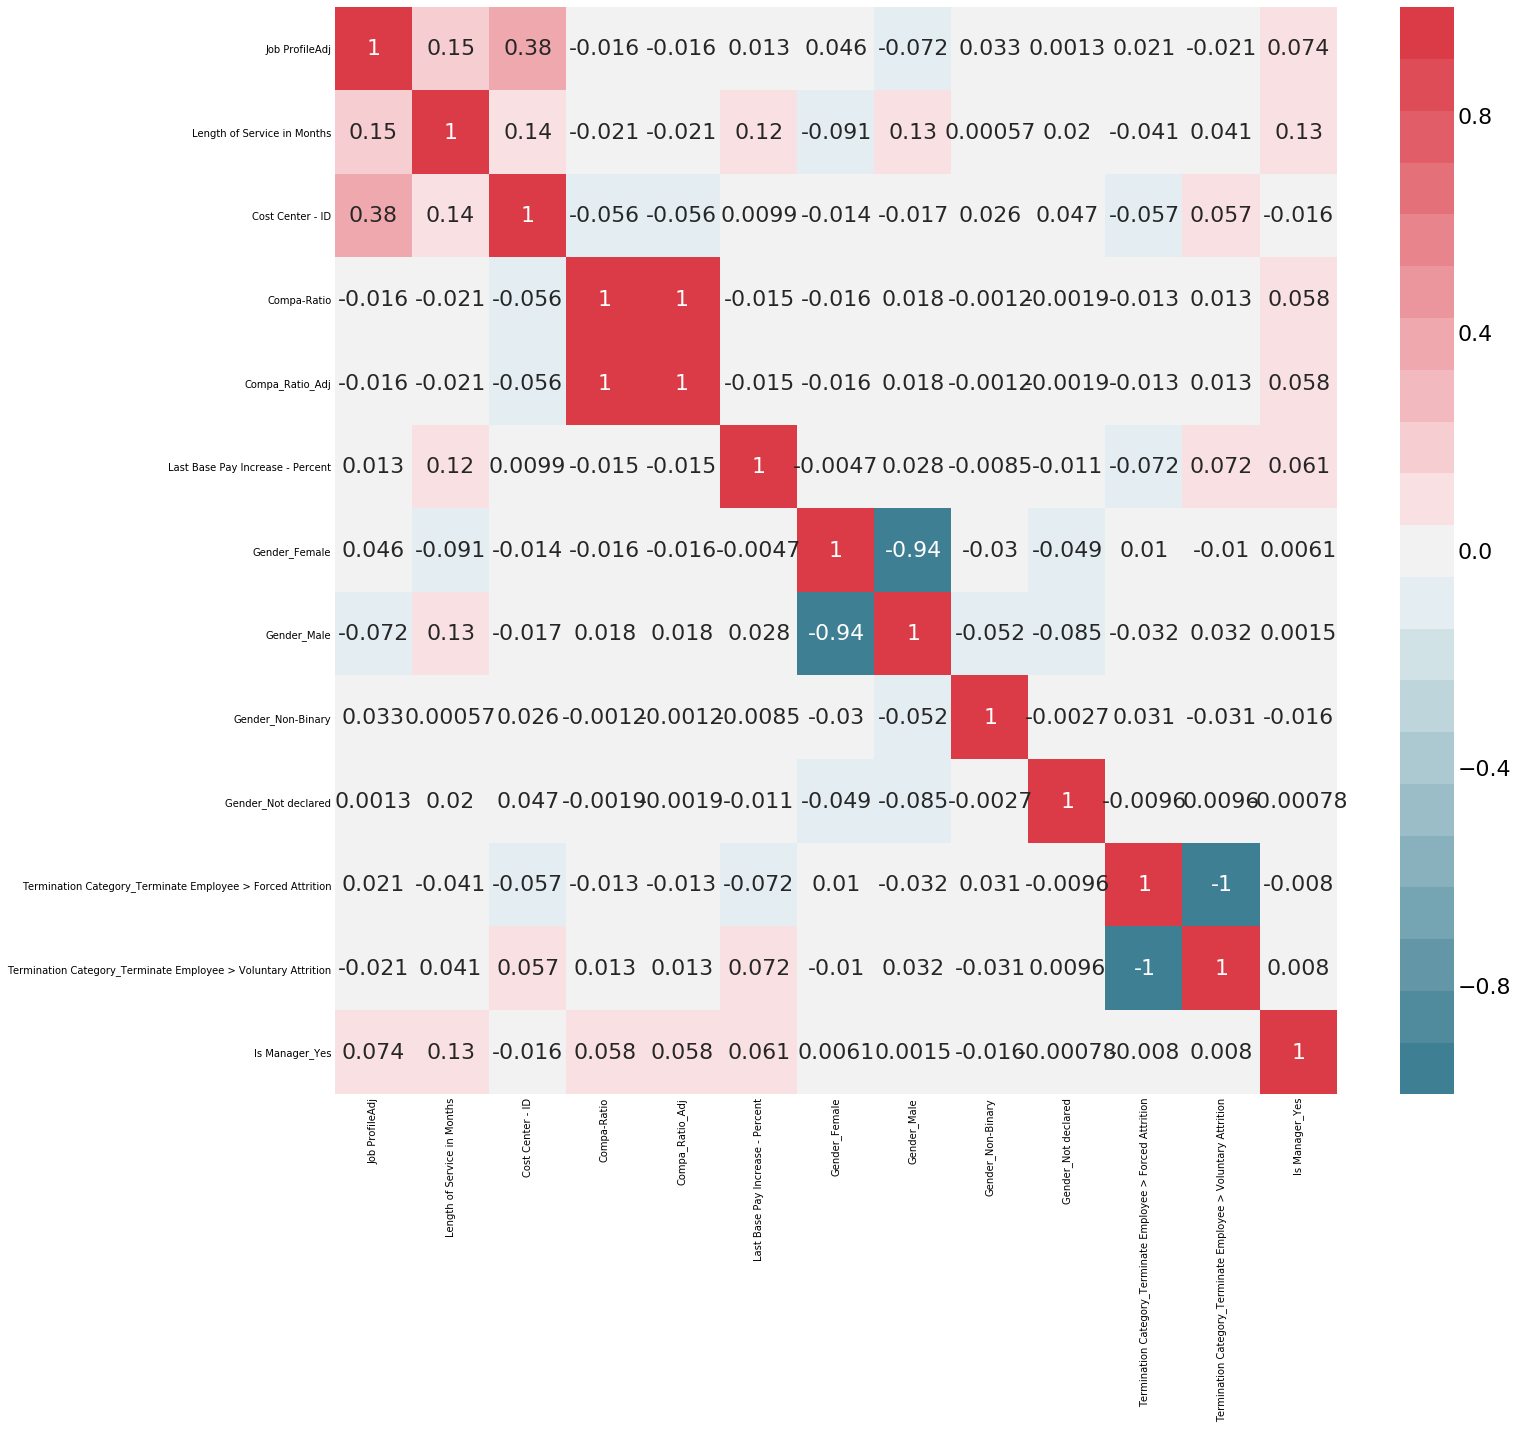

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.rcParams.update({'font.size': 22})
sns.heatmap(data.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
             ax=ax,
           );

In [8]:
data = dummies ##Apply dummy set to regular set

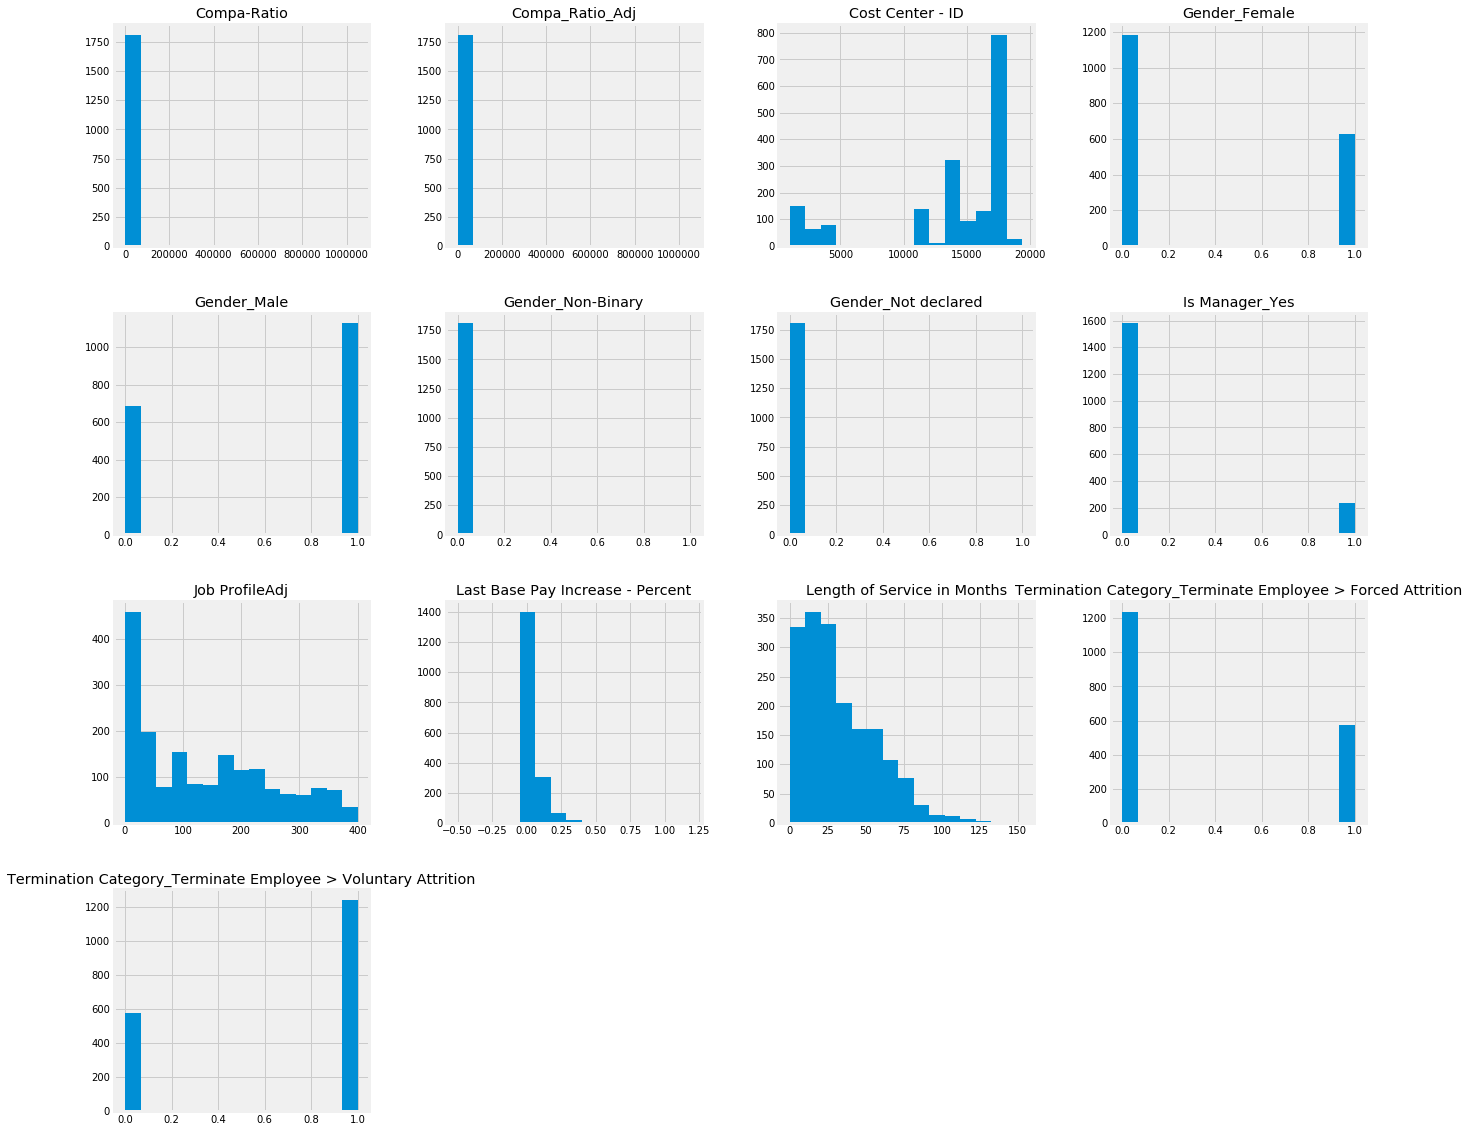

In [9]:
plt.rcParams.update({'font.size': 10})
ax = data.hist(figsize=(20,20), bins = 15)

/Users/evankatz/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


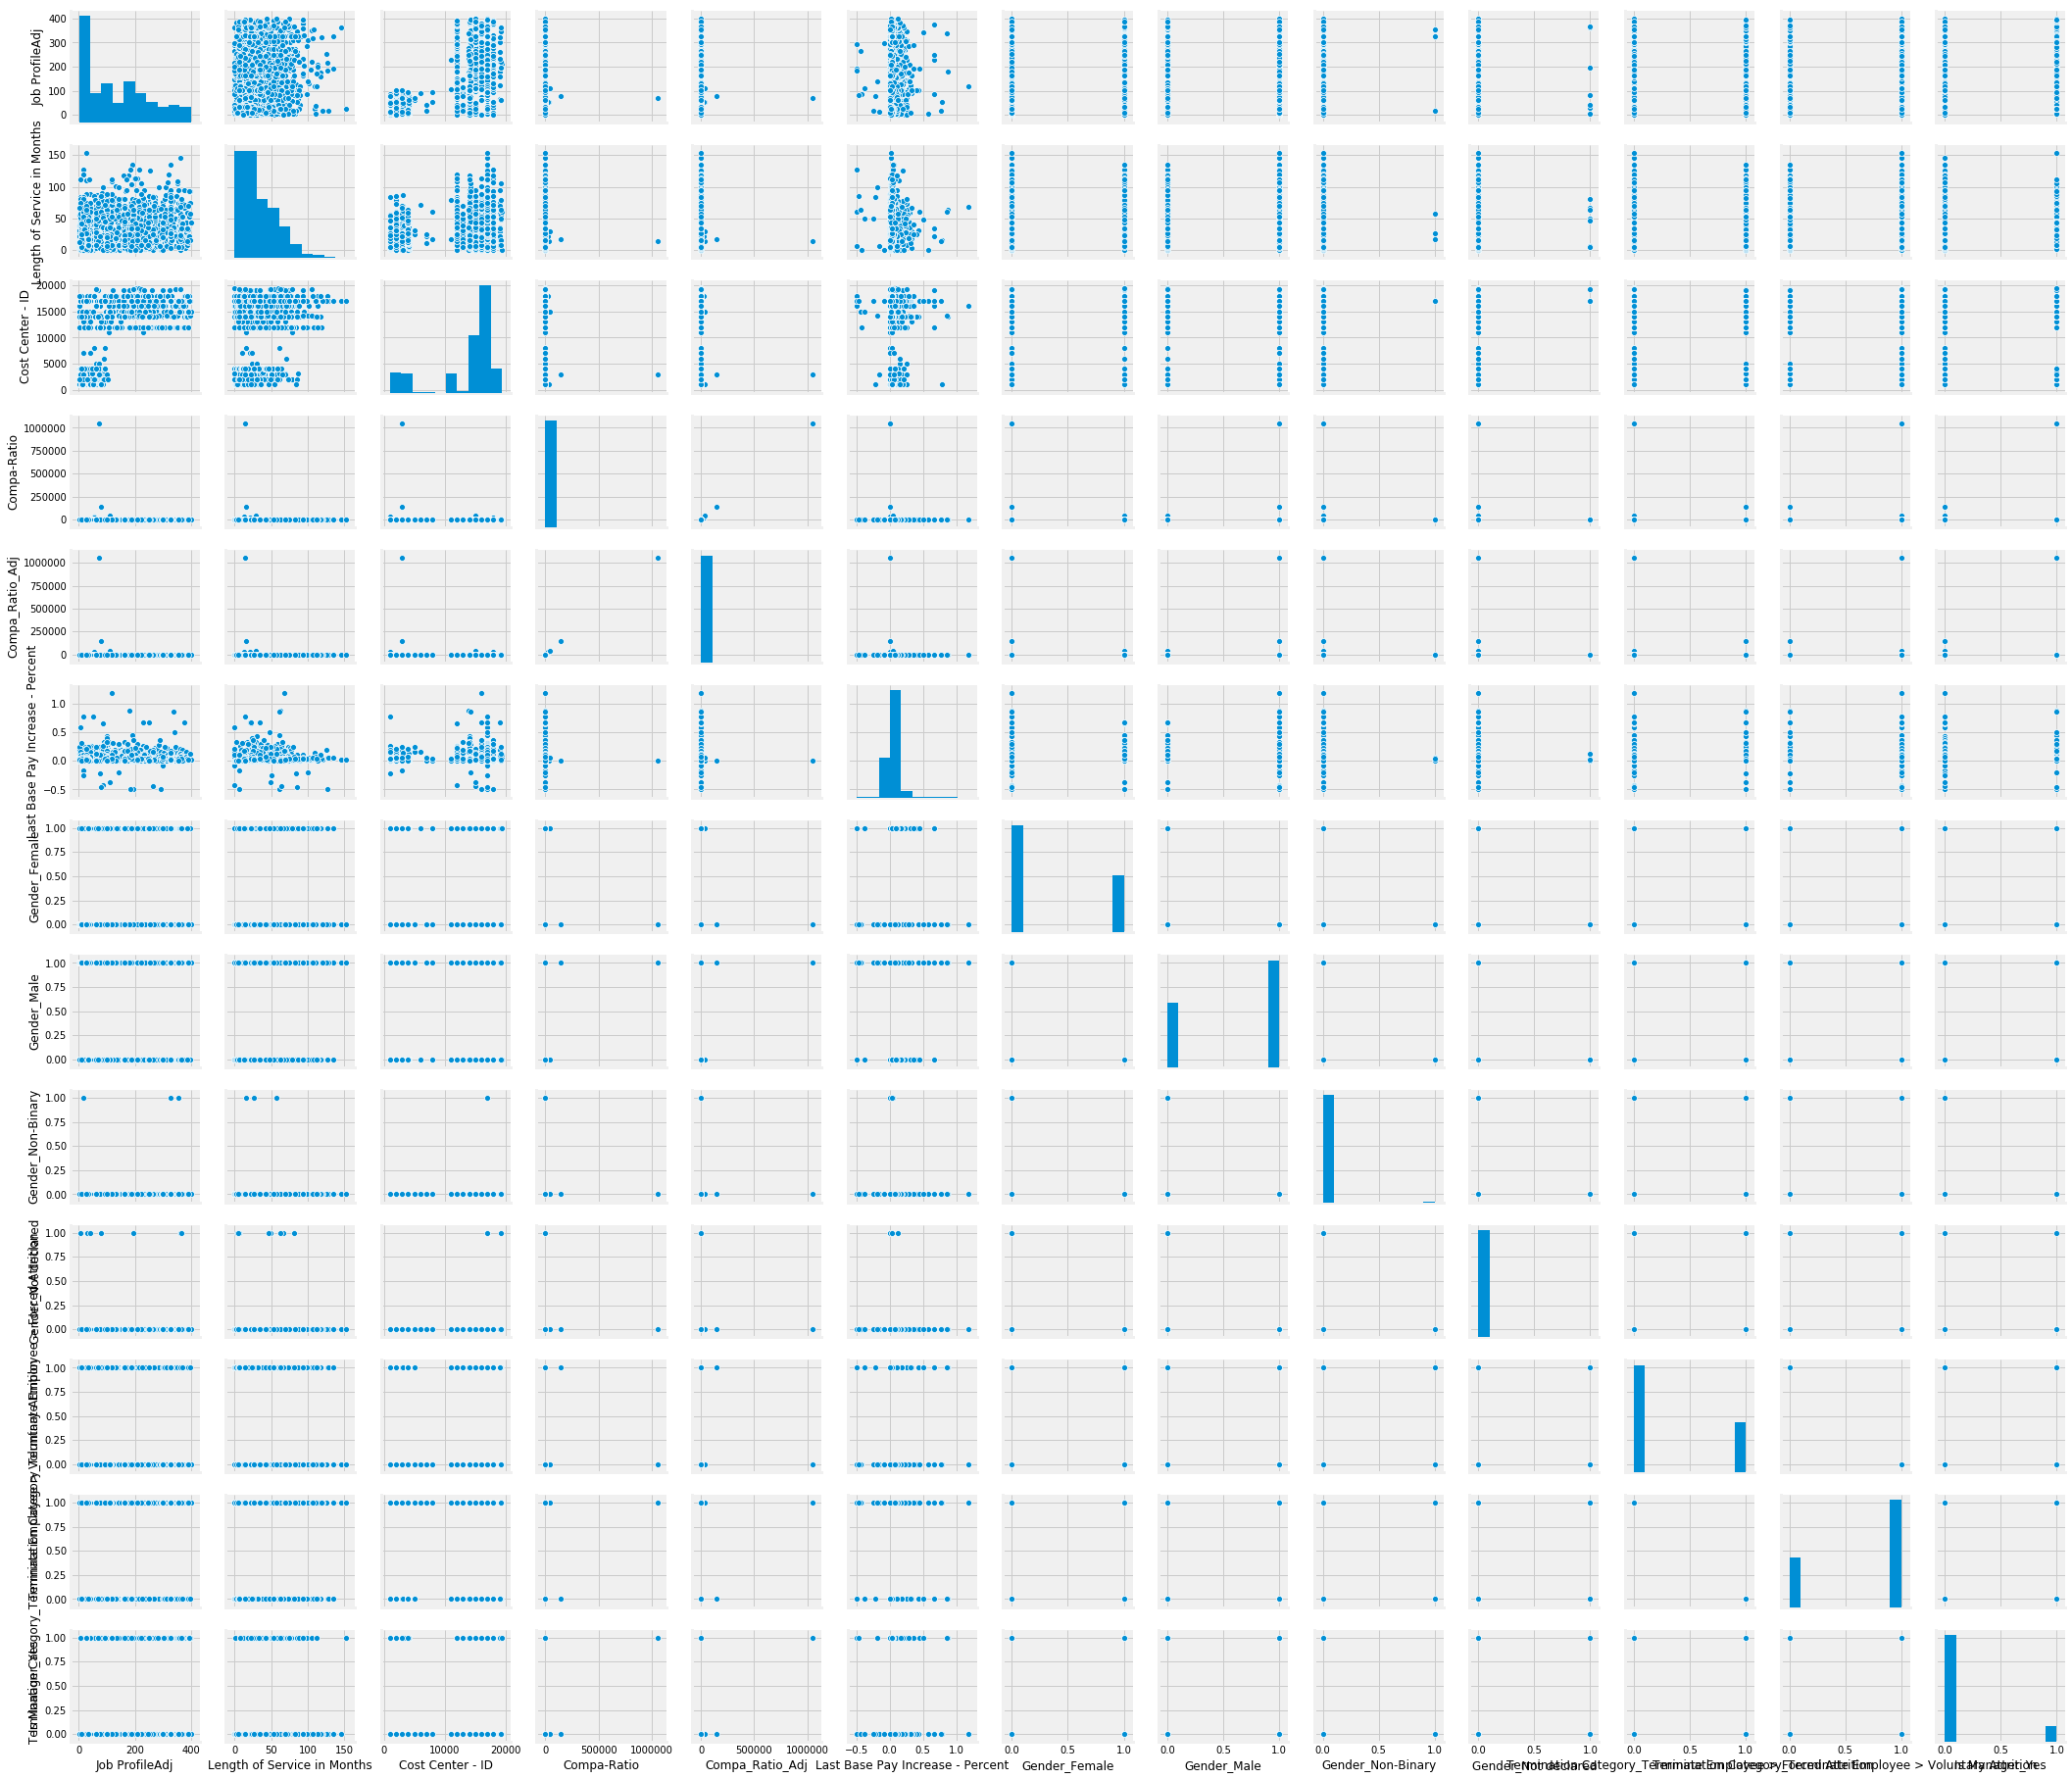

In [10]:
g = sns.pairplot(data)

Difficult to find any linear relelationships to any of the variables (including target variables).

## Linear Regression

In [29]:
target_col = 'Length of Service in Months'
y = data.loc[:, target_col]
feature_cols = ['Is Manager_Yes','Gender_Female','Gender_Male','Last Base Pay Increase - Percent','Termination Category_Terminate Employee > Voluntary Attrition','Termination Category_Terminate Employee > Forced Attrition','Compa_Ratio_Adj']
X = data.loc[:, feature_cols]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, random_state=16)

In [31]:
print(X_train.index)
print(X_test.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360],
           dtype='int64', length=1361)
Int64Index([1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370,
            ...
            1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814],
           dtype='int64', length=454)


In [32]:
from sklearn.linear_model import LinearRegression

lr_test = LinearRegression()
lr_test.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
from sklearn.metrics import mean_squared_error

predictions = lr_test.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions))

lr_test.score(X_test,y_test)

-0.020353836628606015

In [34]:
# Evaluating the model 
print('Test Data R-Squared:', lr_test.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_test.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

Test Data R-Squared: -0.020353836628606015
Training Data R-Squared: 0.057476247059216945


Current method of linear regression is not giving accurate outputs.

In [35]:
list(zip(lr_test.predict(X_test), y_test))

## Attempt at predicting how many months someone has worked before termed, not too accurate...

[(32.5220442247488, 30),
 (31.820254840328218, 19),
 (65.4623168865943, 14),
 (32.04411113768495, 111),
 (27.230332496269178, 14),
 (30.023709207229246, 26),
 (32.26236300815289, 77),
 (32.84853303270465, 29),
 (34.34841123562088, 95),
 (30.92479945195794, 9),
 (40.900122403483216, 38),
 (30.924803370904783, 18),
 (26.33936427096048, 75),
 (27.04676937805783, 40),
 (31.59638770823609, 75),
 (36.29750227481513, 78),
 (26.558748158937874, 26),
 (27.681403694429047, 25),
 (27.23481366564735, 27),
 (37.58619495889356, 24),
 (30.92480267932593, 9),
 (25.88716151634372, 8),
 (32.71570331290995, 51),
 (37.59515038186136, 19),
 (32.048598300746534, 45),
 (37.81901474763807, 29),
 (37.595150151335076, 77),
 (26.10541223418023, 106),
 (32.760476508802086, 29),
 (32.557508988352865, 79),
 (14.693017404977088, 67),
 (30.023737561962292, 7),
 (26.576657852242043, 59),
 (32.78136920465645, 16),
 (35.8031052823485, 66),
 (30.9247694835409, 0),
 (26.496069880267264, 30),
 (37.595149920808794, 63),
 (3

## KFold

In [18]:
# Use `GridSearchCV` with a `kf` object.
# /scrub/
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

lr = LinearRegression()
lr_grid = GridSearchCV(estimator=lr, param_grid={}, cv=kf, return_train_score=True)
lr_grid.fit(X, y)
results = lr_grid.cv_results_
print('train_score', results['mean_train_score'][0])
print('test_score',results['mean_test_score'][0])

train_score 0.05377481235113
test_score 0.03381203966361291


Even KFold is not giving us back strong data.

## Logistic Regression

In [19]:
target_col = 'Termination Category_Terminate Employee > Voluntary Attrition' ##predict whether someone will voluntary leave the organziation
feature_col = ['Compa-Ratio','Gender_Female','Gender_Male','Gender_Non-Binary','Gender_Not declared','Last Base Pay Increase - Percent','Job ProfileAdj','Cost Center - ID']
X = data.loc[:, feature_col]
y = data.loc[:, target_col]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
data.columns

Index(['Business Title', 'Job Profile', 'Job ProfileAdj', 'Worker Type',
       'Position ID', 'Compensation Grade',
       'Race/Ethnicity (Locale Sensitive)', 'Management Level', 'Hire Date',
       'Length of Service in Months', 'Last Day of Work',
       'Termination Date - All', 'Resignation Date', 'Employee Type',
       'Cost Center', 'Cost Center - ID', 'Company', 'Location',
       'Primary Termination Reason', 'Secondary Termination Reasons',
       'Job Family', 'Primary Work Address - Country', 'Work Address - City',
       'Total Base Pay - Amount', 'Total Base Pay - Currency', 'Compa-Ratio',
       'Compa_Ratio_Adj', 'Compensation Range - Minimum',
       'Compensation Range - Midpoint', 'Compensation Range - Maximum',
       'Last Base Pay Increase - Date', 'Last Base Pay Increase - Percent',
       'Gender_Female', 'Gender_Male', 'Gender_Non-Binary',
       'Gender_Not declared',
       'Termination Category_Terminate Employee > Forced Attrition',
       'Termination Ca

In [22]:
# Import a model class
from sklearn.linear_model import LogisticRegression

# Create a model from that class
lr = LogisticRegression()

# Ask the model to learn a function that predicts `y` from `X`
lr.fit(X_train, y_train)

/Users/evankatz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
# Score the model on the test data
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

## Performs better than Linear Regression!

0.6722997795738428
0.7048458149779736


In [37]:
y.value_counts(normalize=True)

## 68% chance at guessing someone terminated voluntarily.

0      0.026997
5      0.026997
23     0.024242
6      0.024242
15     0.023691
12     0.023140
16     0.022590
24     0.022039
21     0.021488
26     0.020937
20     0.020386
14     0.020386
13     0.019284
18     0.018733
27     0.018182
17     0.018182
22     0.018182
28     0.017631
10     0.017080
25     0.017080
36     0.017080
7      0.017080
19     0.017080
8      0.017080
29     0.015427
11     0.015427
4      0.014325
34     0.014325
53     0.014325
37     0.013223
         ...   
88     0.001653
93     0.001653
81     0.001653
112    0.001102
99     0.001102
113    0.001102
118    0.001102
106    0.001102
89     0.001102
100    0.001102
95     0.001102
135    0.001102
127    0.001102
111    0.001102
126    0.000551
120    0.000551
119    0.000551
114    0.000551
128    0.000551
146    0.000551
110    0.000551
109    0.000551
108    0.000551
107    0.000551
104    0.000551
101    0.000551
91     0.000551
90     0.000551
82     0.000551
153    0.000551
Name: Length of Service 

In [25]:
y.value_counts()

1    1239
0     576
Name: Termination Category_Terminate Employee > Voluntary Attrition, dtype: int64

In [26]:
list(zip(lr.predict(X_test), y_test))

[(1, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 

In [27]:
print('Test Data R-Squared:', lr.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared

Test Data R-Squared: 0.7048458149779736
Training Data R-Squared: 0.6722997795738428


Logistic Regression is giving better results than by using Linear Regression.

## Thoughts and Next Steps

- Figure out correct model to apply to data set (most likely to use Logistic Regression as the data is categorical in nature)
- Introduce active employees into model
- Identify most important variables to use in model
- How to capture the variety of 'Job Profiles' and other string columns (i.e. convert to binary)
- Determine what feature to predict
- Obtain additional data to support model